## データ分析前準備

In [1]:
%load_ext autoreload
%autoreload


In [2]:

# ライブラリ読み込み（データ準備で使用）
import numpy as np
import pandas as pd
import IPython as ipy
from pandas import DataFrame
pd.options.display.max_rows = 101
pd.options.display.max_columns = 40

# ライブラリ読み込み（データ可視化で使用）
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() #seaborneのグラフレイアウト

# ライブラリ読み込み（モデル評価で使用）
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 環境依存定数
import os
import sys
HOME_DIR = '/Users/ryoma.uehara/PycharmProjects/InfoNear'

# アプリ定数
PYSRC_DIR = os.path.join(HOME_DIR, 'py')
DATA_DIR = os.path.join(HOME_DIR, 'data/titanic')
EVAL_DIR = os.path.join(HOME_DIR, 'eval')

# 共通スクリプト呼び出し用にパスを通す
sys.path.append(PYSRC_DIR)

# dataフォルダに移動
os.chdir(DATA_DIR)

# 今回のワイン品質NG演習では、品質（quality）が「3」のものを異常としたいため目的変数を以下の様にする
# - 品質（quality）が「3」を異常（target=1）
# - それ以外を正常（target=0）
def cvt_target(x):
    if x == 3:
        return 1
    return 0

def cvt_alcohol(x):
    if x > 5:
        return 'High'
    return 'Low'

def cvt_alcohol(x):
    if x > 10:
        return 'High'
    return 'Low'

def cvt_ph(x):
    if x > 3:
        return 'High'
    return 'Low'


df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### カテゴリ変数の組み合わせで特徴量を生成し目的変数別に可視化

In [3]:
from eda import CategoryCombiBarPlotter
plotter = CategoryCombiBarPlotter()

Sex-Cabin is many category! (num=173)


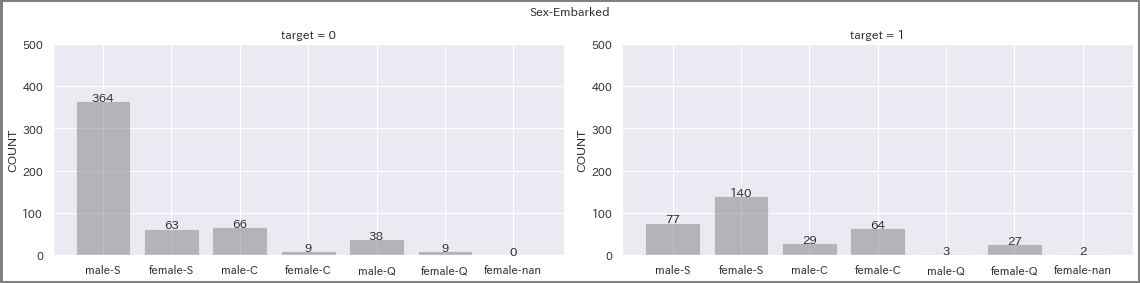

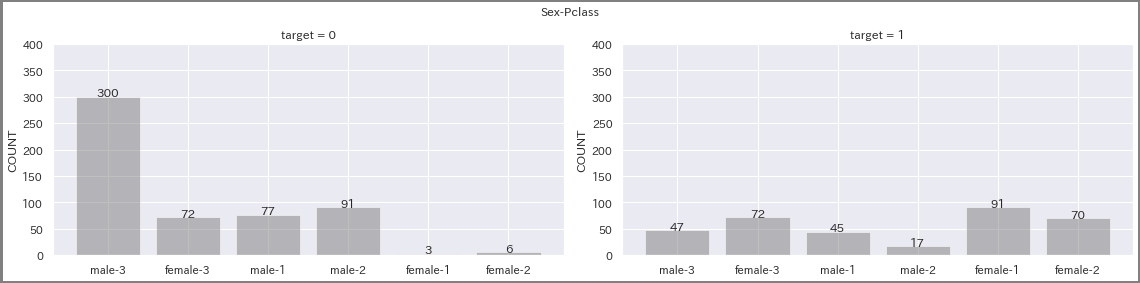

In [4]:
plotter.plot(df=df, base_col='Sex', cols=['Cabin', 'Embarked', 'Pclass'], group_col='Survived')